In [105]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
import numpy as np

In [106]:
factory = PokemonFactory("pokemon.json")

In [107]:
def barGraphGroupedPercent(data, miny, maxY, groupLabels, barLabels, barColors, xLabel, yLabel, title, times):
    fig, ax = plt.subplots()
    bar_width = 0.175
    bar_positions = np.arange(len(data))

    for i, (label, color) in enumerate(zip(barLabels, barColors)):
        success_data = [sublist[i]*100/times if i < len(sublist) else 0 for sublist in data]
        ax.bar(
            bar_positions + i * bar_width,
            success_data,
            width=bar_width,
            label=label,
            color=color
        )
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions])
    ax.set_xticklabels(groupLabels)
    handles = []
    for c in colors: handles.append(plt.Rectangle((0,0),1,1, color=c))
    ax.legend(handles, barLabels)

    # Mostrar el gráfico
    plt.ylim(miny, maxY)
    plt.show()

In [108]:

pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

successPokeBall = [0, 0, 0, 0, 0]
successUltraBall = [0, 0, 0, 0, 0]
successFastBall = [0, 0, 0, 0, 0]
successHeavyBall = [0, 0, 0, 0, 0]

jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

In [109]:
timesThrown = 10000
for _ in range(timesThrown):
    for index, pokemon in enumerate([jolteon, caterpie, snorlax, onix, mewtwo]):
        if attempt_catch(pokemon, "pokeball")[0]:
            successPokeBall[index]+=1
        if attempt_catch(pokemon, "ultraball")[0]:
            successUltraBall[index]+=1
        if attempt_catch(pokemon, "fastball")[0]:
            successFastBall[index]+=1
        if attempt_catch(pokemon, "heavyball")[0]:
            successHeavyBall[index]+=1




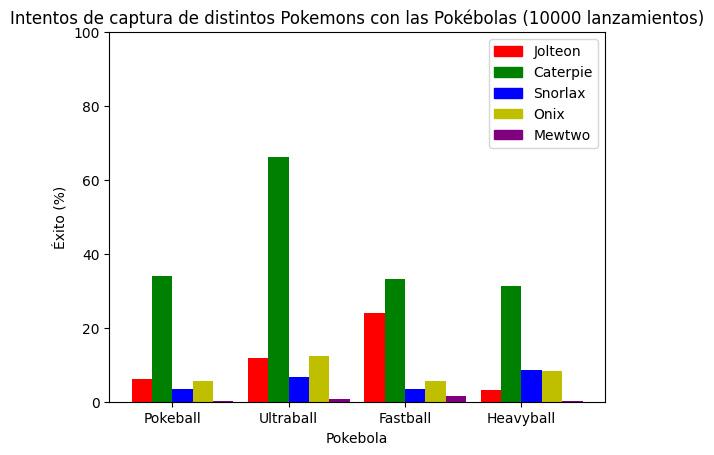

In [110]:
data = [successPokeBall, successUltraBall, successFastBall, successHeavyBall]
groupLabels = ["Pokeball", "Ultraball", "Fastball", "Heavyball"]
barLabels = ["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"]
xLabel = "Pokebola"
yLabel = "Éxito (%)"
title = "Intentos de captura de distintos Pokemons con las Pokébolas (10000 lanzamientos)"
colors = ['r', 'g', 'b', 'y', 'purple']
barGraphGroupedPercent(data, 0, 100, groupLabels, barLabels, colors, xLabel, yLabel, title, timesThrown)


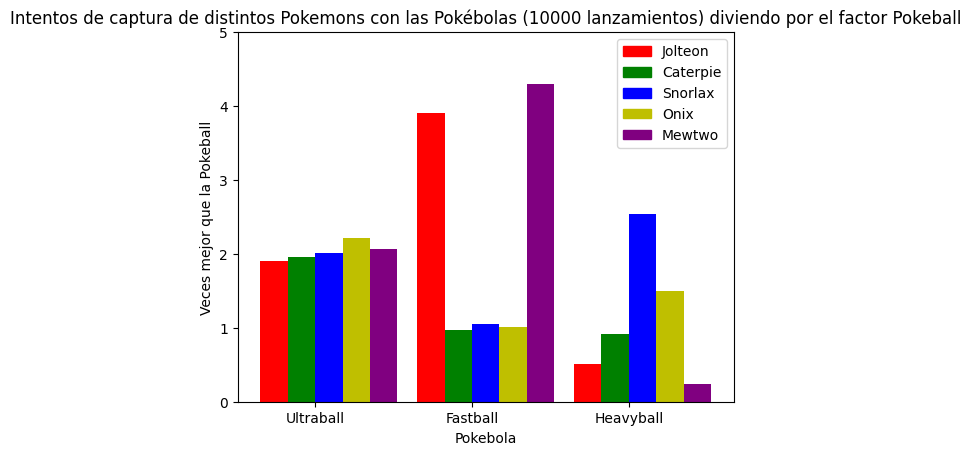

In [111]:
# Para calcular esto vamos a sacar de la cuenta el factor pokebola clasica
# diviendo a todos los valores por el catchrate de usar la pokebola en ese pokemon.
for i in range(len(data[0])):
    divisor = data[0][i]
    for sublist in data[1:]:
        sublist[i] /= divisor
data.pop(0) #Elimino del array la Pokeball
groupLabels = ["Ultraball", "Fastball", "Heavyball"]
yLabel = "Veces mejor que la Pokeball"
title = "Intentos de captura de distintos Pokemons con las Pokébolas (10000 lanzamientos) diviendo por el factor Pokeball"
barGraphGroupedPercent(data, 0, 5, groupLabels, barLabels, colors, xLabel, yLabel, title, 100)


Ej 2

In [112]:
#¿Las condiciones de salud tienen algun efecto sobre la efectividad
# de la captura? Si es ası, ¿Cual es mas o menos efectiva?

In [113]:


# times = 1000
# pokeball = "ultraball"
# 
# health_range = np.linspace(0, 1, times)  # Normalized health values
# 
# # Create empty lists to store catch rates at each health level
# jolteon_catch_rate = [0] * times
# caterpie_catch_rate = [0] * times
# snorlax_catch_rate = [0] * times
# onix_catch_rate = [0] * times
# mewtwo_catch_rate = [0] * times
# 
# # Simulate catching attempts for each Pokemon at different health levels
# for vida in range(times):
#     jolteon = factory.create("jolteon", 100, StatusEffect.NONE, vida / times)
#     caterpie = factory.create("caterpie", 100, StatusEffect.NONE, vida / times)
#     snorlax = factory.create("snorlax", 100, StatusEffect.NONE, vida / times)
#     onix = factory.create("onix", 100, StatusEffect.NONE, vida / times)
#     mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, vida / times)
# 
#     for _ in range(times):
#         jolteon_catch_rate[vida] += attempt_catch(jolteon, pokeball)[0]
#         caterpie_catch_rate[vida] += attempt_catch(caterpie, pokeball)[0]
#         snorlax_catch_rate[vida] += attempt_catch(snorlax, pokeball)[0]
#         onix_catch_rate[vida] += attempt_catch(onix, pokeball)[0]
#         mewtwo_catch_rate[vida] += attempt_catch(mewtwo, pokeball)[0]
# 
# # Calculate linear regression lines for each Pokemon
# jolteon_m, jolteon_b = np.polyfit(health_range, jolteon_catch_rate, 1)
# caterpie_m, caterpie_b = np.polyfit(health_range, caterpie_catch_rate, 1)
# snorlax_m, snorlax_b = np.polyfit(health_range, snorlax_catch_rate, 1)
# onix_m, onix_b = np.polyfit(health_range, onix_catch_rate, 1)
# mewtwo_m, mewtwo_b = np.polyfit(health_range, mewtwo_catch_rate, 1)
# 
# # Generate smoother x-axis points for the fitted lines
# x_smooth = np.linspace(min(health_range), max(health_range), 100)
# 
# # Calculate fitted line y-values for each Pokemon
# jolteon_fitted = jolteon_m * x_smooth + jolteon_b
# caterpie_fitted = caterpie_m * x_smooth + caterpie_b
# snorlax_fitted = snorlax_m * x_smooth + snorlax_b
# onix_fitted = onix_m * x_smooth + onix_b
# mewtwo_fitted = mewtwo_m * x_smooth + mewtwo_b
# 
# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
# 
# # Scatter plots with markers for each Pokemon's catch rate
# plt.scatter(health_range, jolteon_catch_rate, label='Jolteon', marker='o', color='red')
# plt.scatter(health_range, caterpie_catch_rate, label='Caterpie', marker='o', color='green')
# plt.scatter(health_range, snorlax_catch_rate, label='Snorlax', marker='o', color='blue')
# plt.scatter(health_range, onix_catch_rate, label='Onix', marker='o', color='purple')
# plt.scatter(health_range, mewtwo_catch_rate, label='Mewtwo', marker='o', color='orange')
# 
# # Plot the fitted lines for each Pokemon
# plt.plot(x_smooth, jolteon_fitted, label='Jolteon (Fitted)', color='red', linestyle='-')
# plt.plot(x_smooth, caterpie_fitted, label='Caterpie (Fitted)', color='green', linestyle='-')
# plt.plot(x_smooth, snorlax_fitted, label='Snorlax (Fitted)', color='blue', linestyle='-')
# plt.plot(x_smooth, onix_fitted, label='Onix (Fitted)', color='purple', linestyle='-')
# plt.plot(x_smooth, mewtwo_fitted, label='Mewtwo (Fitted)', color='orange', linestyle='-')
# 
# # Set labels and title for the plot
# plt.xlabel("Normalized Health")
# plt.ylabel("Catch Rate (Times Caught)")
# plt.title("Catch Rate vs. Normalized Health (Pokeball)")
# 
# # Add legend
# plt.legend()
# 
# # Adjust x and y axis limits for better visualization
# plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 (normalized health range)
# plt.ylim(0, times)  # Adjust y-axis limit based on the maximum catch rate (times)
# 
# # Show the plot
# plt.grid(True)
# plt.show()

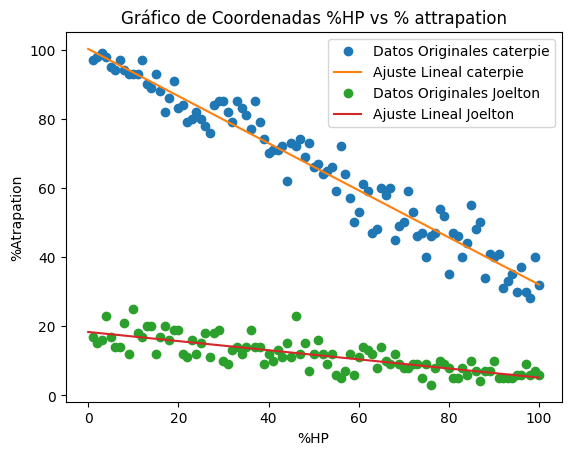

In [114]:
#Ejercicio 2.B
# la idea va a ser la siguiente: 
# Vamos a tomar a un pokemon, y por cada %HP vamos a tirar 100 intentos de captura de la pokebola
# com eso vamos a sacar la probabilidad de captura para cada HP. Con eso vamos a imprimir todos esos puntos en un grafico donde 

#x es la coordenada que va de 0 a 100 HP
#y es la coordenada que va de 0% a 100%

pokebol = "pokeball"
caterpiePoints = []
joeltonPoints = []

for hp_percentage in range(1, 101):
    caterpie = factory.create("caterpie", 100, StatusEffect.NONE, hp_percentage*0.01)
    joelton = factory.create("jolteon", 100, StatusEffect.NONE, hp_percentage*0.01)
    catchRateCaterpie = 0
    catchRateJoelton = 0
    for i in range(0, 100):
        catchRateCaterpie += attempt_catch(caterpie, pokebol)[0]
        catchRateJoelton += attempt_catch(joelton, pokebol)[0]
    caterpiePoints.append(catchRateCaterpie)
    joeltonPoints.append(catchRateJoelton)


xCaterpie = np.array(list(range(1, 101)))
yCaterpie = np.array(caterpiePoints)

coefficientsCaterpie = np.polyfit(xCaterpie, yCaterpie, 1)
polyCaterpie = np.poly1d(coefficientsCaterpie)

x_fit_caterpie = np.linspace(0, 100, 100)
y_fit_caterpie = polyCaterpie(x_fit_caterpie)

xJoelton = np.array(list(range(1, 101)))
yJoelton = np.array(joeltonPoints)


coefficientsJoelton = np.polyfit(xJoelton, yJoelton, 1)
polyJoelton = np.poly1d(coefficientsJoelton)

x_fit_joelton = np.linspace(0, 100, 100)
y_fit_joelton = polyJoelton(x_fit_joelton)



plt.plot(xCaterpie, yCaterpie, 'o', label='Datos Originales caterpie')
plt.plot(x_fit_caterpie, y_fit_caterpie, '-', label='Ajuste Lineal caterpie')

plt.plot(xJoelton, yJoelton, 'o', label='Datos Originales Joelton')
plt.plot(x_fit_joelton, y_fit_joelton, '-', label='Ajuste Lineal Joelton')


plt.title('Gráfico de Coordenadas %HP vs % attrapation')
plt.xlabel('%HP')
plt.ylabel('%Atrapation')
plt.legend()
plt.show()

Aca podemos ver las probabilidades de atrape segun el nivel de HP.
Se puede ver que los puntos generan una funcion lineal decreciente. Es decir, a medida de que sube el HP, baja la probabilidad de captura 

EN caterpie es super evidente, mientras que en Joelton de por si la probabilidad de captura es baja, y a medida de que sube el HP se convierte casi en imposible de capturar


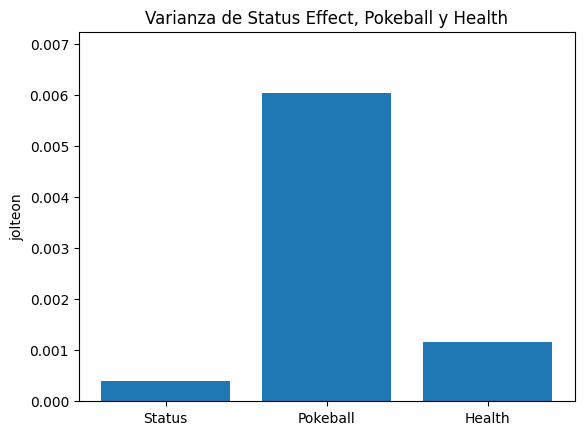

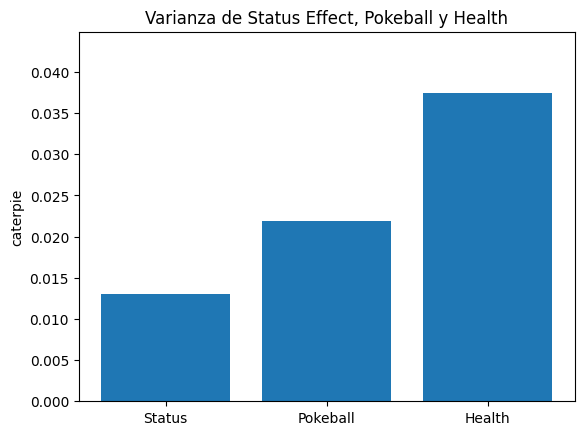

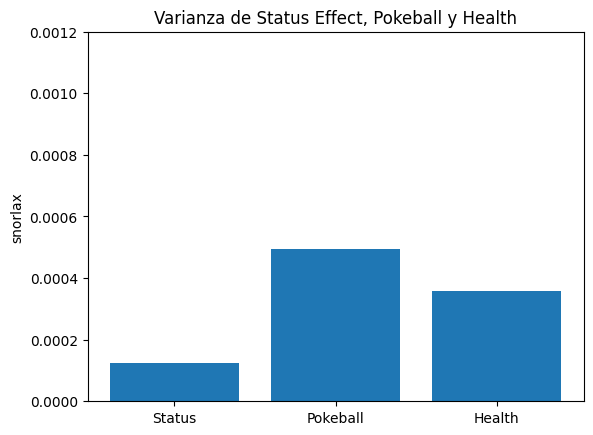

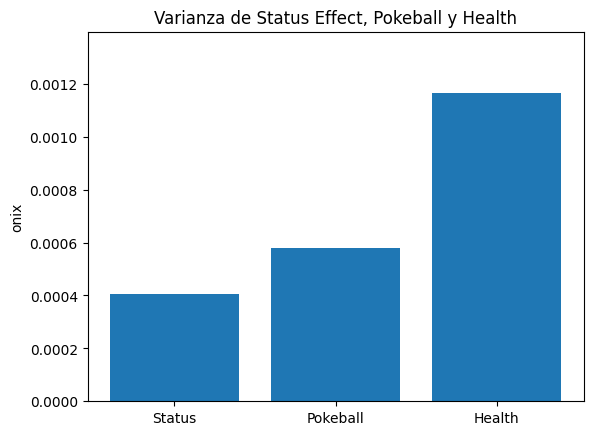

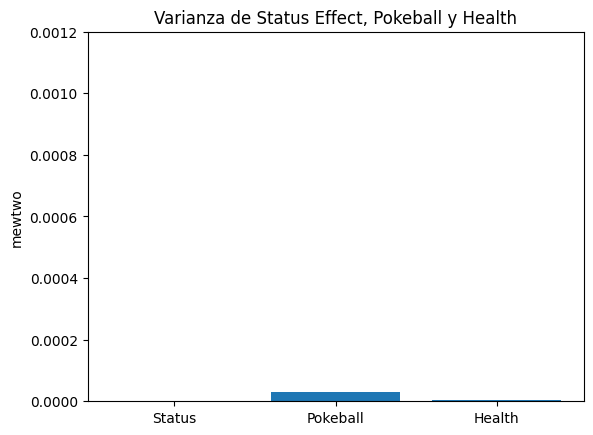

In [115]:
#Ejercicio 2.C

#Vamos a variar el efecto de estado, vida y pokebola para ver cual es el parametro que tiene mayor varianza.

#El catch rate ya lo tenemos, es el segundo valor del llamado a funcion. 
#Hay que variar por ejemplo, la vida de 0 a 100 e ir viendo el valor del catch rate y sacar la varianza.
#Tambien variar la pokebola, es decir probar una de las 4 que hay, anotar los 4 catchrate y ver la varianza
#Para el status, tenemos 6 status, vemos el catchrate para los 6 valores y sacamos la varianza.

#Usamos jolteon de ejemplo!

graph2 = []
for pokemon in ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]:
    
    defaultPokemon = factory.create(pokemon, 100, StatusEffect.NONE, 1)
    
    statusValues = []
    pokeballsValues = []
    healthValues = []
    
    for effect in StatusEffect:
        pokemonEffect = factory.create(pokemon, 100, effect, 1)
        statusValues.append(attempt_catch(pokemonEffect, "pokeball")[1])
    
    for ball in ["pokeball", "ultraball", "fastball", "heavyball"]:
        pokeballsValues.append(attempt_catch(defaultPokemon, ball)[1])
    
    for healthPercentage in range(100 + 1):
        pokemonHealth = factory.create(pokemon, 100, StatusEffect.NONE, healthPercentage/100)
        healthValues.append(attempt_catch(pokemonHealth, "pokeball")[1])
        
    
    graphicValues = [np.var(statusValues), np.var(pokeballsValues), np.var(healthValues)]
    graph2.append(graphicValues)
    x = range(len(graphicValues))
    plt.bar(x, graphicValues, tick_label=["Status", "Pokeball", "Health"])
    plt.ylabel(pokemon)
    plt.ylim(0, max(max(graphicValues),0.001)*1.2)
    plt.title("Varianza de Status Effect, Pokeball y Health")
    plt.show()

In [116]:
#Ejercicio 2.D
#propiedades mutables: current_hp, level, status_effect
#Teniendo en cuenta uno o dos pokemones distintos: ¿Qu ́e combinaci ́on de condiciones(propiedades mutables) y pokebola conviene utilizar para capturarlos?
pokemonsToTest = ["jolteon", "caterpie", "mewtwo"]

pokemonsRateMap = { pokemon: { "catchrate" : 0, "level" : 0, "status" : StatusEffect.NONE, "pokeball" : pokeballs[0]} for pokemon in pokemonsToTest }

for level in range(1, 100):
    for status in StatusEffect:
        for pokeball in pokeballs:
            for pokemon in pokemonsToTest:
                currentPokemon = factory.create(pokemon, level, status, 1)
                currentCatchRate = attempt_catch(currentPokemon, pokeball)[1]
                if currentCatchRate > pokemonsRateMap[pokemon]["catchrate"]:
                    pokemonsRateMap[pokemon] = {
                        "catchrate": currentCatchRate,
                        "level": level,
                        "status": status,
                        "pokeball": pokeball
                    }
print("{:<10} {:<15} {:<15} {:<10} {:<10}\n".format("Pokemon", "Catch Rate", "Status Effect", "Level", "Pokeball"))
for pokemon in pokemonsToTest:
    data = pokemonsRateMap[pokemon]
    print("{:<10} {:<15} {:<15} {:<10} {:<10}".format(pokemon.capitalize(), data["catchrate"],data["status"].name, data["level"], data["pokeball"]))

Pokemon    Catch Rate      Status Effect   Level      Pokeball  

Jolteon    0.4689          SLEEP           1          fastball  
Caterpie   1               SLEEP           1          ultraball 
Mewtwo     0.0314          SLEEP           1          fastball  


In [117]:

# Comparemos ahora entre nivel 10 100 10 como va cambiando el catch rate, la pokeball y la
#Ejercicio 2.E

pokemonsToTest = ["jolteon", "caterpie", "mewtwo"]

pokemonsRateMap = {pokemon: [{"catchrate": 0} for _ in range(10)] for pokemon in pokemonsToTest}


for level in range(0, 110,10):
    for status in StatusEffect:
        for pokeball in pokeballs:
            for pokemon in pokemonsToTest:
                currentPokemon = factory.create(pokemon, level, status, 1)
                currentCatchRate = attempt_catch(currentPokemon, pokeball)[1]
                if currentCatchRate >  pokemonsRateMap[pokemon][int(level/10) - 1]["catchrate"]:
                    pokemonsRateMap[pokemon][int(level/10)-1] ={
                        "catchrate": currentCatchRate,
                        "level": level,
                        "status": status,
                        "pokeball": pokeball
                    }
           
print("{:<10} {:<15} {:<15} {:<10} {:<10}\n".format("Pokemon", "Catch Rate", "Status Effect", "Level", "Pokeball"))
for pokemon in pokemonsToTest:
    for data in pokemonsRateMap[pokemon]:
        print("{:<10} {:<15} {:<15} {:<10} {:<10}".format(pokemon.capitalize(), data["catchrate"],data["status"].name, data["level"], data["pokeball"]))


Pokemon    Catch Rate      Status Effect   Level      Pokeball  

Jolteon    0.4688          SLEEP           10         fastball  
Jolteon    0.4688          SLEEP           20         fastball  
Jolteon    0.4688          SLEEP           30         fastball  
Jolteon    0.4688          SLEEP           40         fastball  
Jolteon    0.4688          SLEEP           50         fastball  
Jolteon    0.4688          SLEEP           60         fastball  
Jolteon    0.4688          SLEEP           70         fastball  
Jolteon    0.4688          SLEEP           80         fastball  
Jolteon    0.4688          SLEEP           90         fastball  
Jolteon    0.4689          SLEEP           0          fastball  
Caterpie   1               SLEEP           10         ultraball 
Caterpie   1               SLEEP           20         ultraball 
Caterpie   1               SLEEP           30         ultraball 
Caterpie   1               SLEEP           40         ultraball 
Caterpie   1            